## Return of Investment

This notebook is intended to show an approximation of the probability functions produced by the stochastic process outlined in "Pandora Event Raumfalten" Event.

Each Scenario shows two plots:

- An empirical PDF (probability density function)
- An empirical CDF (cummulative density function)

Points of interest marked in the plots are:

- the mean (in both)
- the "i have 95% chance to fulfill my target function" point

### First Scenario

- All the previously available tanks are owned, 
- Target: `I want to get all three Prime tanks`

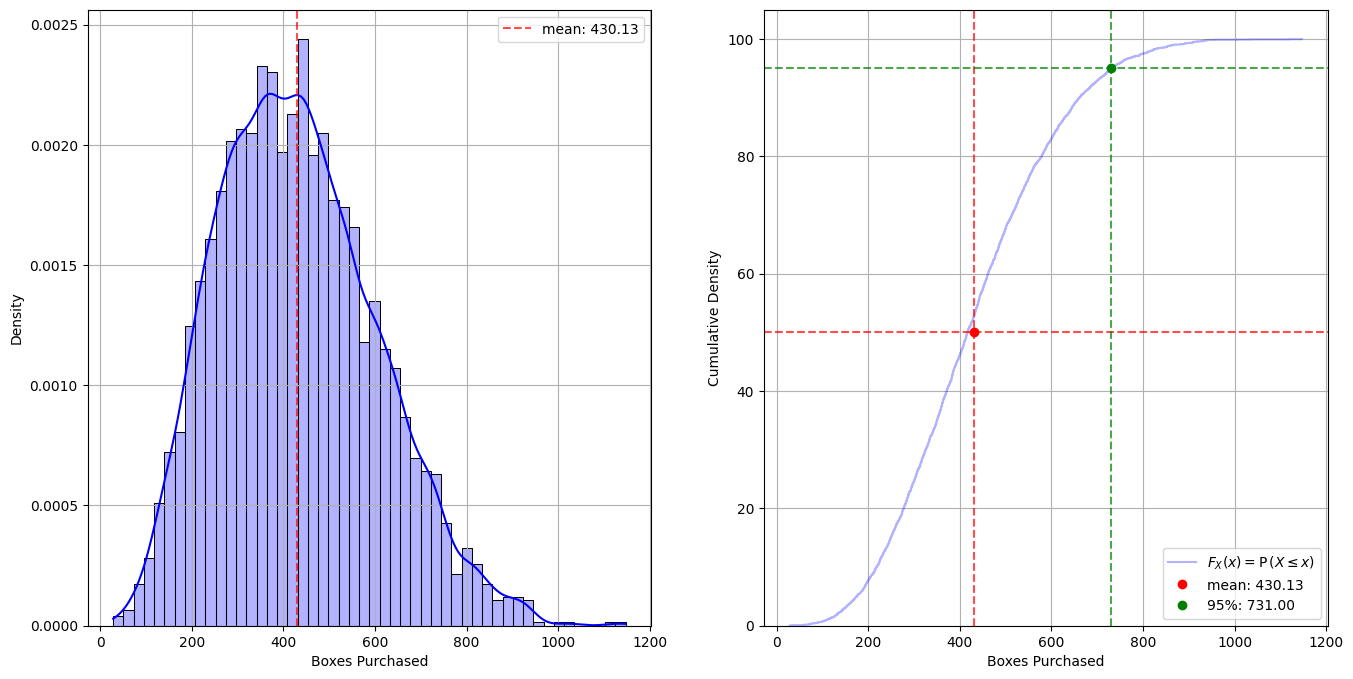

In [2]:
from matplotlib import pyplot as plt
from multiprocessing import Pool
from importlib import reload
from copy import deepcopy

from wot import montecarlo, visualize
from wot.implementations.pandora_tiered import pandora_config, all_prime_received

# Set up configuration
# For our first experiment assume we have all previously available vehicles
config = deepcopy(pandora_config)
config.preowned_vehicles = {
    "proto": 7,
    "alpha": 4
}


def objective(_):
    return montecarlo.montecarlo_for_target(target_fn=all_prime_received, config=config)

# Set up the simulation

N = 20000

with Pool() as pool:
    results = pool.map(objective, range(N))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig, ax1 = visualize.pdf(results, fn_get_result=visualize.fn_purchased_containers, ax=ax1)
fig, ax2 = visualize.cdf(results, fn_get_result=visualize.fn_purchased_containers, ax=ax2)


### Second Scenario

- Non of the previously available tanks are owned
- Target: `I want to get all three Prime tanks`

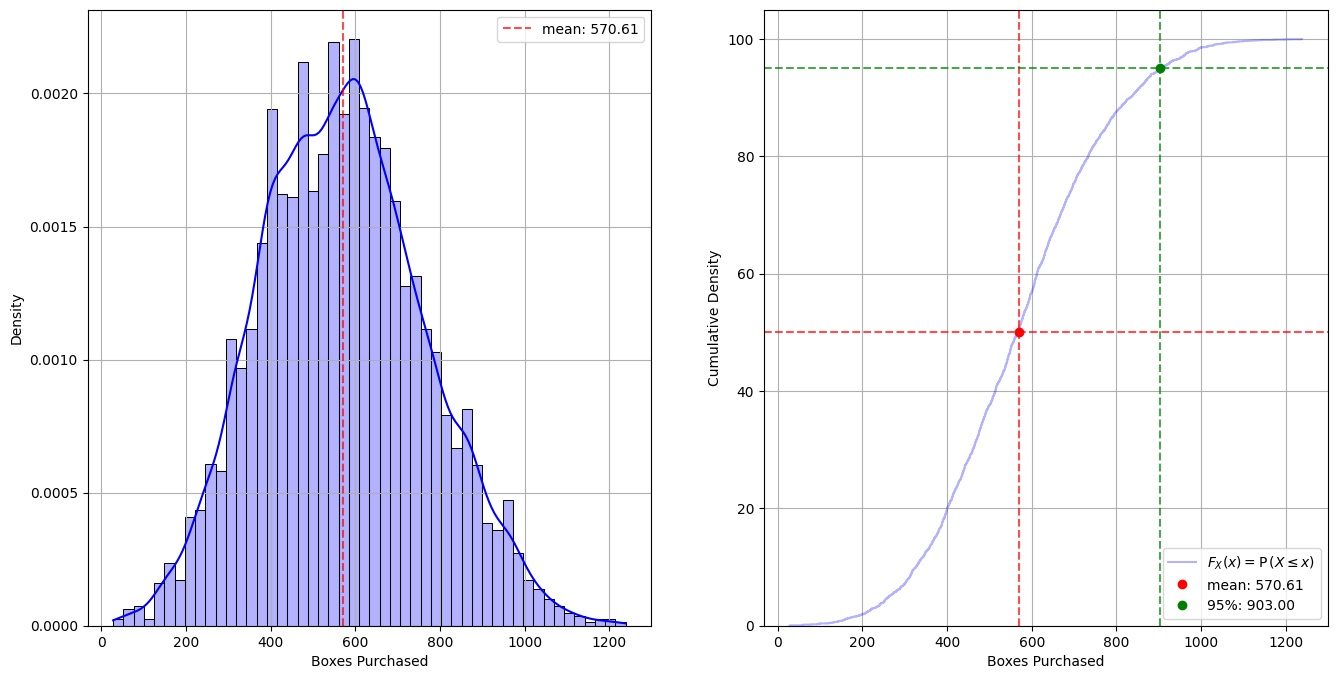

In [3]:
# Set up configuration
# For our first experiment assume we have all previously available vehicles
config = deepcopy(pandora_config)
config.preowned_vehicles = {
    "proto": 0,
    "alpha": 0
}



def objective(_):
    return montecarlo.montecarlo_for_target(target_fn=all_prime_received, config=config)

# Set up the simulation

N = 20000

with Pool() as pool:
    results = pool.map(objective, range(N))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig, ax1 = visualize.pdf(results, fn_get_result=visualize.fn_purchased_containers, ax=ax1)
fig, ax2 = visualize.cdf(results, fn_get_result=visualize.fn_purchased_containers, ax=ax2)


### Third Scenario

- 4 Proto tanks, 2 Alpha tanks are already in the garage
- Target: `I want to get all three Prime tanks`

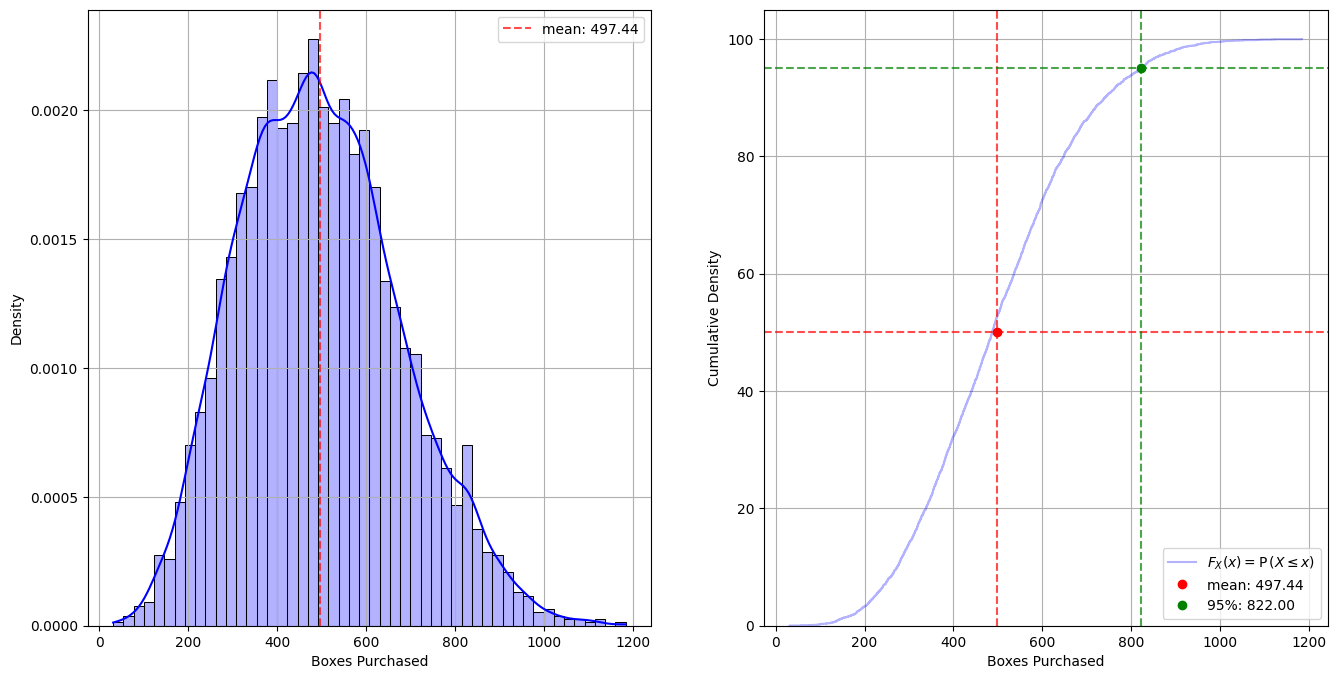

In [4]:
# Set up configuration
# For our first experiment assume we have all previously available vehicles
config = deepcopy(pandora_config)
config.preowned_vehicles = {
    "proto": 4,
    "alpha": 2
}



def objective(_):
    return montecarlo.montecarlo_for_target(target_fn=all_prime_received, config=config)

# Set up the simulation

N = 20000

with Pool() as pool:
    results = pool.map(objective, range(N))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig, ax1 = visualize.pdf(results, fn_get_result=visualize.fn_purchased_containers, ax=ax1)
fig, ax2 = visualize.cdf(results, fn_get_result=visualize.fn_purchased_containers, ax=ax2)

### Bonus Scenario

- No previously available tanks are owned
- Target: `I want it all!!!!`

#### Explanation

It might seem counter-intuitive that this is worse for the "sure thing" point of 95% chance. The reason for this are rather devious:

- There is no "guaranteed" scenario for alpha boxes
    - Therefor there is no real "safe" amount of boxes you have to aquire that make you get all alpha tanks eventually
        - Therefor this has a *really fat tail*


It should be noted, that i in fact did encounter a run here during experimentation that tool more than 70s instead of 15s that i expected.The reason for this is that, during this run, some experiments got "unlucky" and had to open > 1800 boxes to get all alpha tanks.

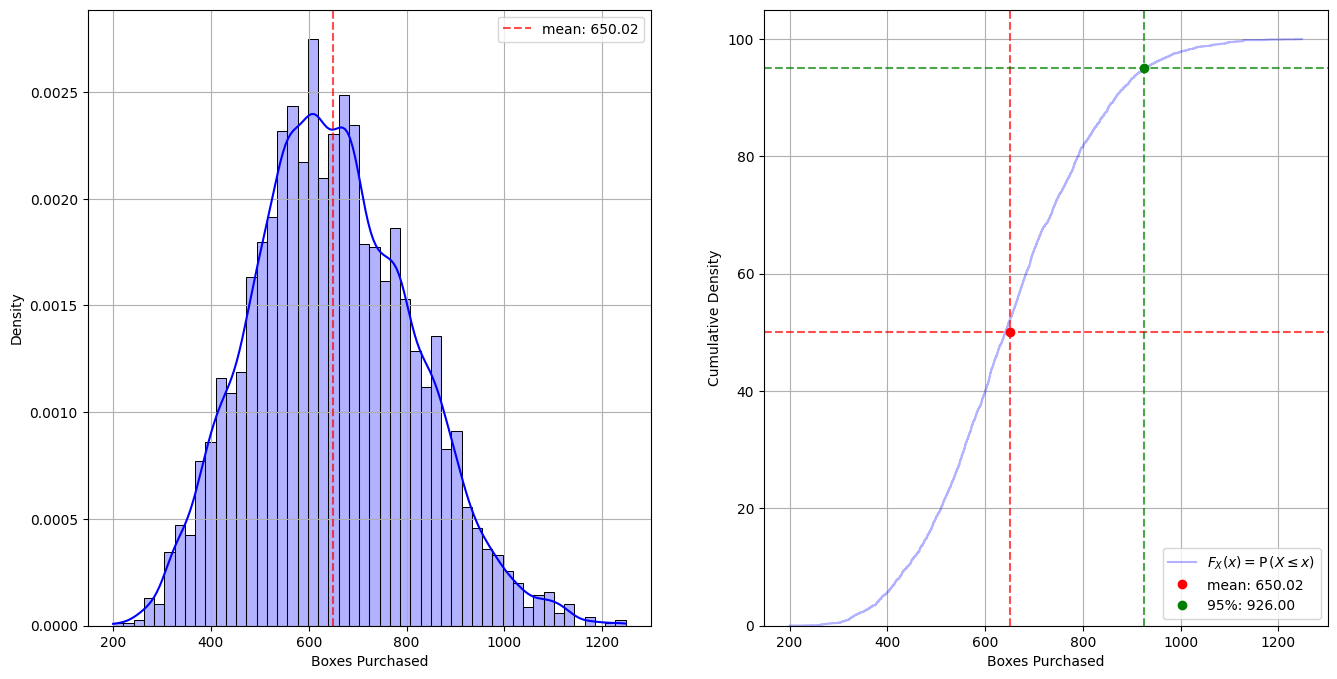

In [5]:
# Set up configuration
# For our first experiment assume we have all previously available vehicles
config = deepcopy(pandora_config)
config.preowned_vehicles = {
    "proto": 0,
    "alpha": 0
}


def gimme_all(state: montecarlo.SimulationState) -> bool:
    if state.received_vehicles.get("proto", 0) == 10 and state.received_vehicles.get("alpha", 0) == 5 and state.received_vehicles.get("prime", 0) == 3:
        return True
    return False
    

def objective(_):
    return montecarlo.montecarlo_for_target(target_fn=gimme_all, config=config)

# Set up the simulation

N = 20000

with Pool() as pool:
    results = pool.map(objective, range(N))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

fig, ax1 = visualize.pdf(results, fn_get_result=visualize.fn_purchased_containers, ax=ax1)
fig, ax2 = visualize.cdf(results, fn_get_result=visualize.fn_purchased_containers, ax=ax2)